In [1]:
# 2022-2-17
# Ripped from README from https://github.com/imr-framework/pypulseq

# ===
# 1. Import PyPulseq
# ===
import math
import numpy as np
import pypulseq as pp

from matplotlib import pyplot as plt

# ===
# 3. First, define system limits in Opts and then create a Sequence object with it
# ===
system = pp.Opts(max_grad=32, grad_unit='mT/m',max_slew=130, slew_unit='mT/m/ms', grad_raster_time=4e-6)  # Original had mT/m/s which raised value error
seq = pp.Sequence(system=system)

# ===
# 3. Then, design gradient, RF or ADC pulse sequence events
# ===
Nx, Ny = 256, 256  # matrix size
fov = 220e-3  # field of view
delta_k = fov / Nx

# RF sinc pulse with a 90 degree flip angle
rf90 = pp.make_sinc_pulse(flip_angle=90, duration=2e-3, system=system,
                          slice_thickness=5e-3, apodization=0.5, time_bw_product=4)

# Frequency encode, trapezoidal event
gx = pp.make_trapezoid(channel='x', flat_area=Nx *
                       delta_k, flat_time=6.4e-3, system=system)

# ADC readout
adc = pp.make_adc(num_samples=Nx, duration=gx.flat_time,
                  delay=gx.rise_time, system=system)


# ===
# 4. Add these pulse sequence events to the Sequence object from step 2. One or more events can be executed simultaneously, simply pass them all to the add_block() method. For example, the gx and adc pulse sequence events need to be executed simultaneously
# ===
seq.add_block(rf90)
seq.add_block(gx, adc)

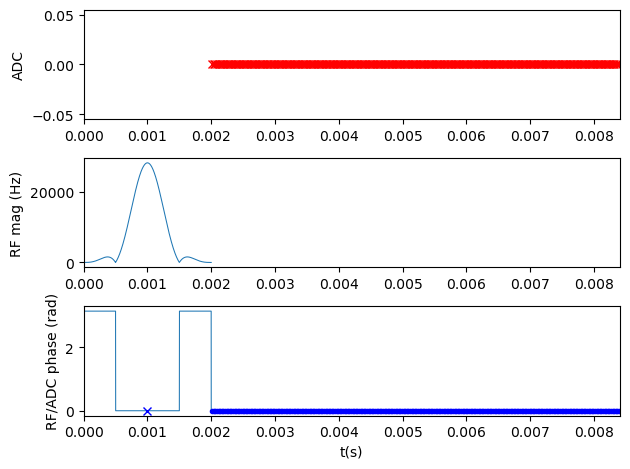

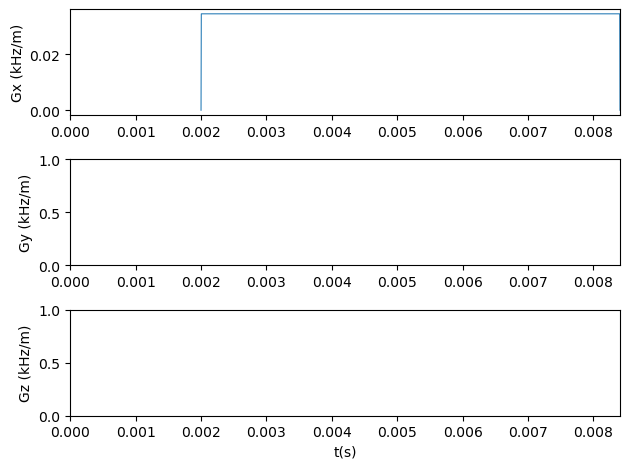

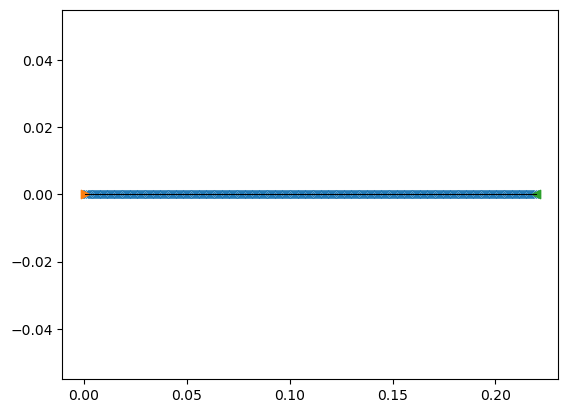

In [2]:
# ===
# 5. Visualize plots
# ===
seq.plot()

k_traj_adc, k_traj, t_excitation, t_refocusing, t_adc = seq.calculate_kspace()
plt.figure(1)
plt.plot(k_traj_adc[0,:],k_traj_adc[1,:],'k')
plt.scatter(k_traj_adc[0,:],k_traj_adc[1,:],marker="x")
plt.scatter(k_traj_adc[0,0],k_traj_adc[1,0],marker=">")
plt.scatter(k_traj_adc[0,-1],k_traj_adc[1,-1],marker="<")
plt.show()